# 데이터 살펴보기

100%|██████████| 170498071/170498071 [00:11<00:00, 15026654.81it/s]


Extracting ./datas/cifar-10-python.tar.gz to ./datas/


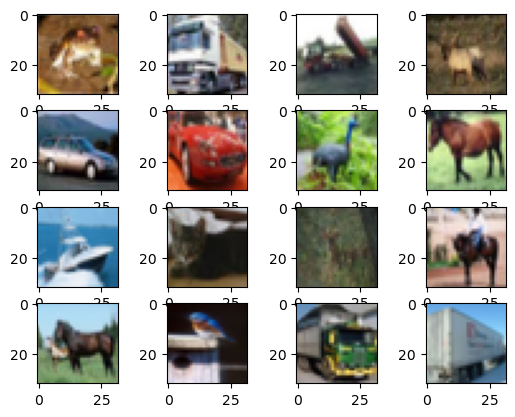

In [6]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

# ❶ CIFAR10 데이터셋을 불러옴

training_data = CIFAR10( #train data 마련
    root="./datas/", 
    train=True,
    download=True, 
    transform=ToTensor())



for i in range(16):
   plt.subplot(4, 4, i+1)
   #plt.title("class:"+ class_name[training_data.targets[i]])
   plt.imshow(training_data.data[i]) #이미지 출력을 위한 부분
plt.show()

# 데이터 전처리에 크롭핑과 뒤집기 적용

Files already downloaded and verified
Files already downloaded and verified


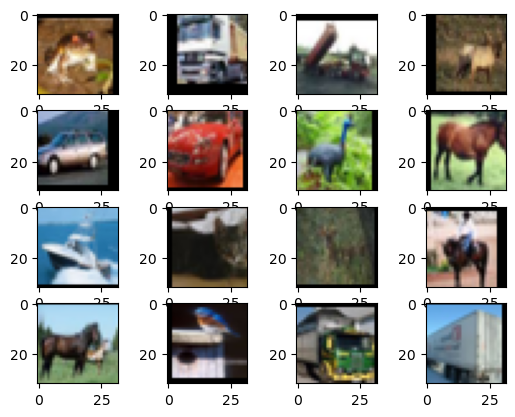

In [12]:
import matplotlib.pyplot as plt
import torchvision.transforms as T


from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose, Resize, Normalize
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([ # ❶ 데이터 전처리 함수들 : transforms 객체
   T.ToPILImage(), #이미지 변환 자유자재 : 텐서를 다시 이미지로 변환
   RandomCrop((32, 32), padding=4), # ➋ 랜덤으로 이미지 일부 제거 후 패딩 : 이미지 중앙에 있지 않더라도 개체를 인식하는 방법을 학습하고 과적합을 방지
   RandomHorizontalFlip(p=0.5),     # ➌ y축으로 기준으로 대칭 (VirticalFlip : X축 대칭), 50
])



training_data = CIFAR10(
    root="./datas", 
    train=True, 
    download=True, 
    transform=transforms) # transform에는 데이터를 변환하는 함수가 들어감

test_data = CIFAR10(
    root="./datas", 
    train=False, 
    download=True, 
    transform=transforms)

for i in range(16):
   plt.subplot(4, 4, i+1)
   plt.imshow(transforms(training_data.data[i])) #원래 이미지가 아닌 이미지 변환 적용
plt.show()

# 데이터 정규화

## 데이터의 평균과 표준편차 알기

In [13]:
import torch

training_data = CIFAR10(
    root="./datas", 
    train=True, 
    download=True, 
    transform=ToTensor())

# item[0]은 이미지, item[1]은 정답 레이블 - 리스트 형태로 각각의 이미지를 쌓음
imgs = [item[0] for item in training_data]

# ❶imgs를 하나로 합침 - 샘플 단위 기준으로 쌓음 : (N, C, H, W)' 모양의 단일 텐서를 생성. 여기서 N은 샘플 수, C는 채널 수, H와 W는 각각 이미지의 높이와 너비
imgs = torch.stack(imgs, dim=0).numpy() 
#tensor -> numpy배열로 변환 : 시각화 등 일부 파이썬 라이브러리가 numpy에서 더 잘 작동
print(imgs.shape)
#이미지 각 채널의 평균과 표준편차 계산#
# -> 정규화 : 모델의 분포를 중앙으로 옮겨 모델의 편향을 줄임. 매개변수 최적화에 용이함. 
# 이거 안하면 피처간의 값차이가 커져 옵티마이저(경사하강법에 사용되는 알고리즘. SGD(Stochastic Gradient Descent), Adam, Adagrad 및 RMSprop등.) 수렴이 어렵다.
# rgb 각각(채널)의 평균
mean_r = imgs[:,0,:,:].mean() #채널 0의 mean
mean_g = imgs[:,1,:,:].mean()
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

# rgb 각각(채널)의 표준편차
std_r = imgs[:,0,:,:].std() 
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)

Files already downloaded and verified
(50000, 3, 32, 32)
0.49139968 0.48215827 0.44653124
0.24703233 0.24348505 0.26158768


## 데이터 정규화 적용

Files already downloaded and verified
Files already downloaded and verified


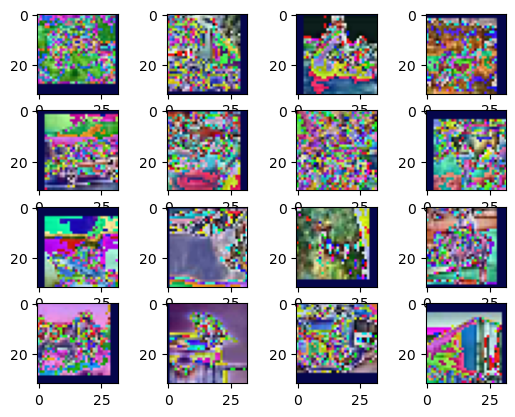

In [14]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize

transforms = Compose([
   T.ToPILImage(), 
   RandomCrop((32, 32), padding=4),
   RandomHorizontalFlip(p=0.5),#50%확률로 좌우로 뒤집음. 과적합 방지.
   T.ToTensor(),
   # ➊ 데이터 정규화 - 학습에는 필요 없다. : 평균 0, 단위분산 없도록함. 이는 모델의 매개변수를 더 쉽게 최적화하고 이미지 간의 밝기 또는 대비 차이의 영향을 줄여 훈련 중에 신경망 모델의 성능을 향상
   # 표준화와 같은 데이터 정규화 기술은 모든 기능이 동일한 척도를 갖도록 하고 데이터를 단위 분산에 더 가깝게 만드는 데 자주 사용
   Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
   T.ToPILImage()
])

training_data = CIFAR10(
    root="./datas", 
    train=True, 
    download=True, 
    transform=transforms)
test_data = CIFAR10(
    root="./datas", 
    train=False, 
    download=True, 
    transform=transforms)

for i in range(16):
   plt.subplot(4, 4, i+1)
   plt.imshow(transforms(training_data.data[i]))
plt.show()